<a href="https://colab.research.google.com/github/Sirfowahid/Experimental_compressive_strengyh_analysis-deep_learning_algorithms/blob/main/Graph_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
display.set_matplotlib_formats('svg')

<ipython-input-2-23d3895c745f>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Projects/08.Parametric Experiment of DL/Experimental_Data.xlsx')

In [ ]:
df.describe()

,Water (kg/m³),Cement (kg/m³),Fine Aggregate (kg/m³),Coarse Aggregate (kg/m³),Admixture (kg/m³),Experimental Compressive Strength (MPa)
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,190.075098,391.290431,677.047412,922.201299,1.508535,29.567152
std,22.856019,78.494908,39.701859,50.338557,1.690548,11.136550
min,162.222662,280.136027,616.118338,843.109305,0.000000,9.300000
25%,168.924314,319.331858,616.118338,843.109305,0.000000,20.160000
50%,180.665440,360.000546,691.068587,941.970610,0.000000,29.910000
75%,224.721057,499.380127,703.046802,960.001456,3.592372,37.800000
max,224.721057,499.380127,738.858427,988.223146,3.692313,50.800000


In [ ]:
cols = df.columns
cols

Index(['Water (kg/m³)', 'Cement (kg/m³)', 'Fine Aggregate (kg/m³)',
       'Coarse Aggregate (kg/m³)', 'Admixture  (kg/m³)',
       'Experimental Compressive Strength (MPa) '],
      dtype='object')

In [ ]:
cols = ['Water (kg/m³)', 'Cement (kg/m³)', 'Fine Aggregate (kg/m³)',
       'Coarse Aggregate (kg/m³)', 'Admixture  (kg/m³)',
       'Compressive Strength (MPa)']

In [ ]:
df.columns = cols

In [ ]:
df.head()

,Water (kg/m³),Cement (kg/m³),Fine Aggregate (kg/m³),Coarse Aggregate (kg/m³),Admixture (kg/m³),Compressive Strength (MPa)
0,197.822602,290.915591,727.288977,972.749006,0.0,22.40
1,192.935528,283.728718,709.321794,948.717900,0.0,21.90
2,194.007380,285.304971,713.262427,953.988496,0.0,21.75
3,190.492498,280.136027,700.340067,936.704840,0.0,22.80
4,198.883371,292.475546,731.188865,977.965107,0.0,21.95


In [ ]:
X = df[['Water (kg/m³)', 'Cement (kg/m³)', 'Fine Aggregate (kg/m³)',
       'Coarse Aggregate (kg/m³)', 'Admixture  (kg/m³)']]

In [ ]:
y = df['Compressive Strength (MPa)']

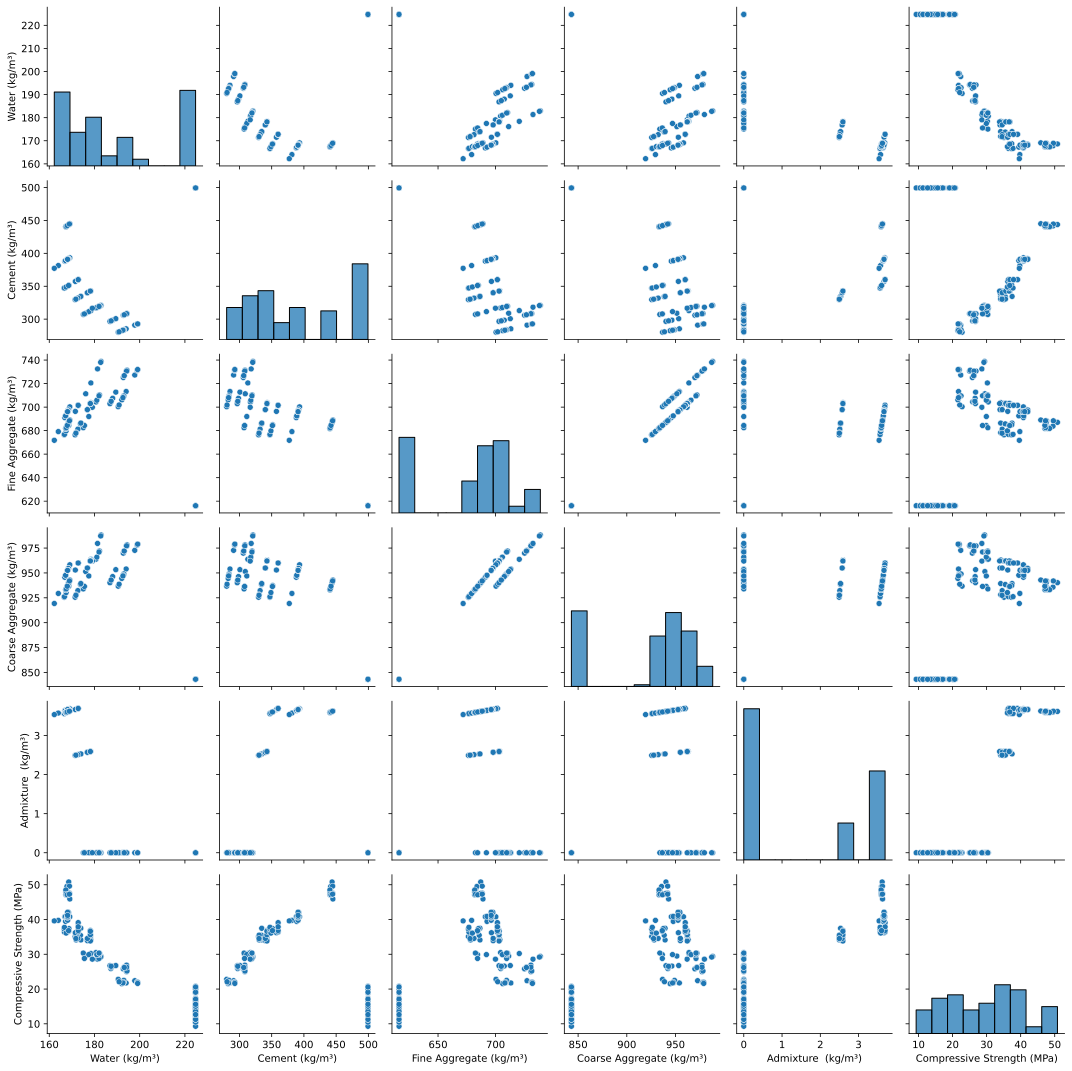

In [ ]:

sns.pairplot(df)
plt.tight_layout()
plt.savefig('pairplot.png')
plt.show()

In [ ]:
n_sample,n_features = X.values.shape
print(n_sample,n_features)
X_reshaped = X.values.reshape((n_sample,n_features,1))

165 5


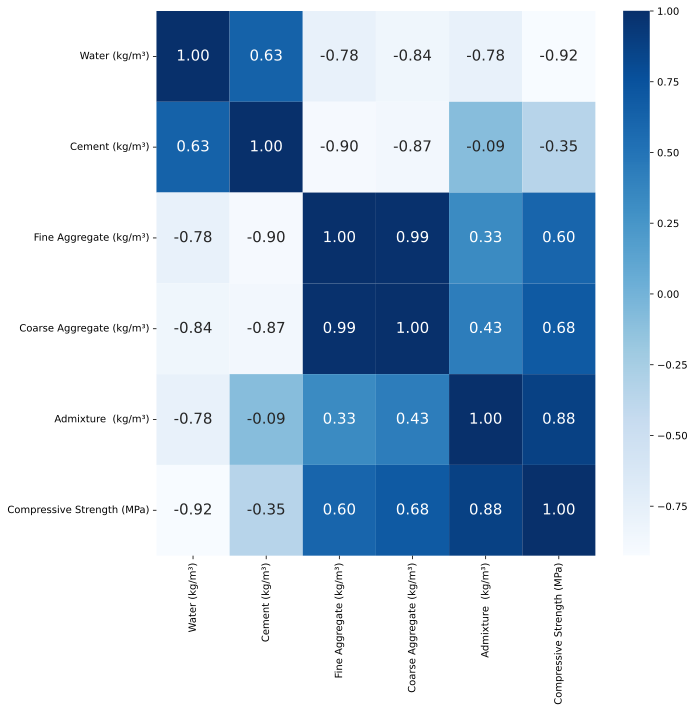

In [ ]:
cm = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='0.2f',cmap='Blues',annot_kws={"size":15})
plt.tight_layout()
plt.savefig('Data corelation.png')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.keras.utils.set_random_seed(2)
np.random.seed(2)
tf.random.set_seed(42)

In [ ]:
df.columns

Index(['Water (kg/m³)', 'Cement (kg/m³)', 'Fine Aggregate (kg/m³)',
       'Coarse Aggregate (kg/m³)', 'Admixture  (kg/m³)',
       'Compressive Strength (MPa)'],
      dtype='object')

In [ ]:
features = ['Water (kg/m³)', 'Cement (kg/m³)', 'Fine Aggregate (kg/m³)',
       'Coarse Aggregate (kg/m³)', 'Admixture  (kg/m³)']
targets = ['Compressive Strength (MPa)']

X = df[features]
y = df[targets]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X.values)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X,y.values.ravel())

RandomForestRegressor()

In [ ]:
imp = rf.feature_importances_

In [ ]:
df.columns

Index(['Water (kg/m³)', 'Cement (kg/m³)', 'Fine Aggregate (kg/m³)',
       'Coarse Aggregate (kg/m³)', 'Admixture  (kg/m³)',
       'Compressive Strength (MPa)'],
      dtype='object')

In [ ]:
imp

array([0.60027507, 0.15905957, 0.01738335, 0.01720569, 0.20607632])

In [ ]:
imp

array([0.60027507, 0.15905957, 0.01738335, 0.01720569, 0.20607632])

<Axes: >

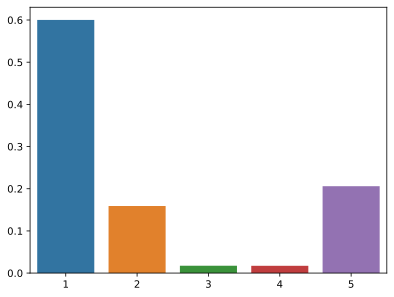

In [ ]:
sns.barplot(x=[1,2,3,4,5],y=imp)